# GUO PEIHONG 
#6208 Assignment 1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
cases = pd.read_table('cases.txt', sep=',', header=None)
cases = cases.T
cases.columns = ['Cases']

In [ ]:
date = pd.read_table('date.txt', sep=',', header=None)
date = date.T
date.columns = ['Date']

In [ ]:
df = pd.concat([date, cases], axis=1)

In [ ]:
df

,Date,Cases
0,"Feb 15, 2020",54
1,"Feb 16, 2020",56
2,"Feb 17, 2020",53
3,"Feb 18, 2020",52
4,"Feb 19, 2020",50
...,...,...
1000,"Nov 11, 2022",78431
1001,"Nov 12, 2022",77506
1002,"Nov 13, 2022",76307
1003,"Nov 14, 2022",75291


## 2. Compile and plot the number of COVID-19 cases in Singapore for the period Feb. 15, 2020 to Jun. 30, 2020

In [ ]:
# Because df.iloc[136] is Jun 30, 2020
df1 = df.iloc[0:137]

In [ ]:
df1

,Date,Cases
0,"Feb 15, 2020",54
1,"Feb 16, 2020",56
2,"Feb 17, 2020",53
3,"Feb 18, 2020",52
4,"Feb 19, 2020",50
...,...,...
132,"Jun 26, 2020",6104
133,"Jun 27, 2020",6057
134,"Jun 28, 2020",5925
135,"Jun 29, 2020",5650


In [ ]:
df1.isnull().sum()

Date     0
Cases    0
dtype: int64

In [ ]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Cases
0,2020-02-15,54
1,2020-02-16,56
2,2020-02-17,53
3,2020-02-18,52
4,2020-02-19,50
...,...,...
132,2020-06-26,6104
133,2020-06-27,6057
134,2020-06-28,5925
135,2020-06-29,5650


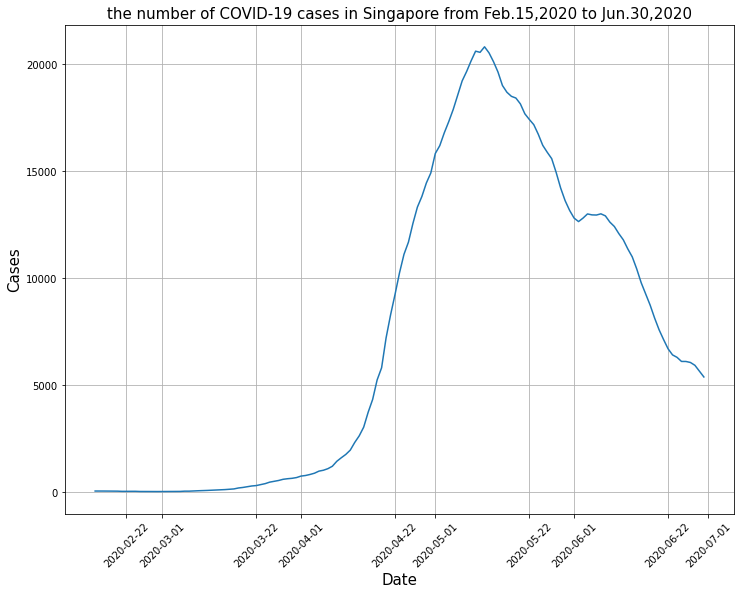

In [ ]:
plt.figure(figsize=(12,9))
plt.xticks(rotation=45)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Cases', fontsize=15)
plt.title("the number of COVID-19 cases in Singapore from Feb.15,2020 to Jun.30,2020", fontsize=15)
sns.lineplot(x='Date',y='Cases',data=df1)
plt.grid()
plt.show()

## 3. Repeat the same for the period Dec. 27, 2021 to Mar. 20, 2022. 

In [ ]:
# Because df.iloc[681] is Dec. 27, 2021, df.iloc[764] is Mar. 20, 2022
df2 = df.iloc[681:765]

In [ ]:
df2

,Date,Cases
681,"Dec 27, 2021",2696
682,"Dec 28, 2021",2776
683,"Dec 29, 2021",2840
684,"Dec 30, 2021",2877
685,"Dec 31, 2021",2868
...,...,...
760,"Mar 16, 2022",42330
761,"Mar 17, 2022",43037
762,"Mar 18, 2022",37938
763,"Mar 19, 2022",36643


In [ ]:
df2.isnull().sum()

Date     0
Cases    0
dtype: int64

In [ ]:
df2['Date'] = pd.to_datetime(df2['Date'])
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Cases
681,2021-12-27,2696
682,2021-12-28,2776
683,2021-12-29,2840
684,2021-12-30,2877
685,2021-12-31,2868
...,...,...
760,2022-03-16,42330
761,2022-03-17,43037
762,2022-03-18,37938
763,2022-03-19,36643


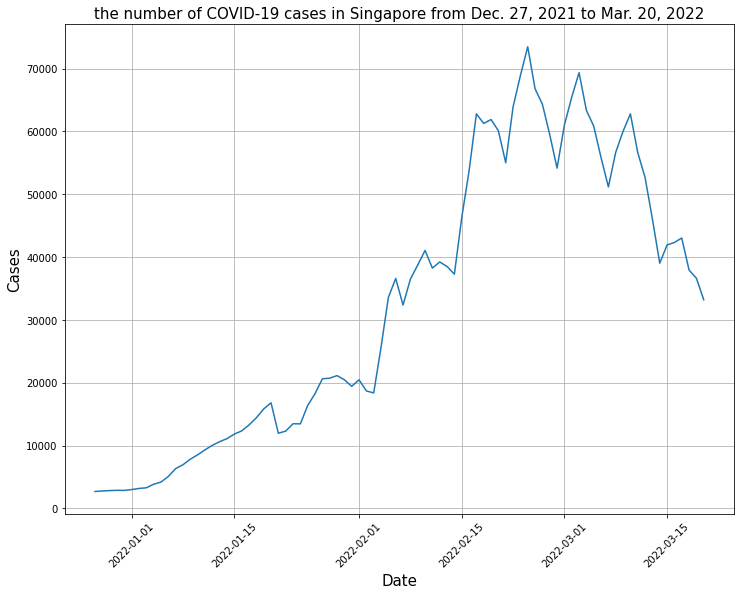

In [ ]:
plt.figure(figsize=(12,9))
plt.xticks(rotation=45)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Cases', fontsize=15)
plt.title("the number of COVID-19 cases in Singapore from Dec. 27, 2021 to Mar. 20, 2022", fontsize=15)
sns.lineplot(x='Date',y='Cases',data=df2)
plt.grid()
plt.show()

## 4. Numerically integrate the SIR model using the 4th order Runge-Kutta method.

In [ ]:
# SIR MODEL
def SIR_S(s, i, beta):
    return -beta * s * i

def SIR_I(s, i, beta, gamma):
    return beta * s * i - gamma * i

def SIR_R(i, gamma):
    return gamma * i

In [ ]:
# RK4
def RK4(s, i, r, beta, gamma):
    s_all = []
    i_all = []
    r_all = []

    s_all.append(s)
    i_all.append(i)
    r_all.append(r)
    
    
    for ii in range(1,200):
        k1_s = SIR_S(s, i, beta)
        k1_i = SIR_I(s, i, beta, gamma)
        k1_r = SIR_R(i, gamma)
       
        k2_s = SIR_S(s+k1_s/2.0, i+k1_i/2.0, beta)
        k2_i = SIR_I(s+k1_s/2.0, i+k1_i/2.0, beta, gamma)
        k2_r = SIR_R(i+k1_i/2.0, gamma)
        
        k3_s = SIR_S(s+k2_s/2.0, i+k2_i/2.0, beta)
        k3_i = SIR_I(s+k2_s/2.0, i+k2_i/2.0, beta, gamma)
        k3_r = SIR_R(i+k2_i/2.0, gamma)
       
        k4_s = SIR_S(s+k3_s, i+k3_i, beta)
        k4_i = SIR_I(s+k3_s, i+k3_i, beta, gamma)
        k4_r = SIR_R(i+k3_i, gamma)
    
        s = s + k1_s/6.0 + k2_s/3.0 + k3_s/3.0 + k4_s/6.0
        i = i + k1_i/6.0 + k2_i/3.0 + k3_i/3.0 + k4_i/6.0
        r = r + k1_r/6.0 + k2_r/3.0 + k3_r/3.0 + k4_r/6.0
        
        s_all.append(s)
        i_all.append(i)
        r_all.append(r)
    
    return [s_all, i_all, r_all]

In [ ]:
# Randomly set the value of the parameter
s = 0.98
i = 0.01
r = 0.01
beta = 0.5
gamma = 0.1

res = RK4(s, i, r, beta, gamma)

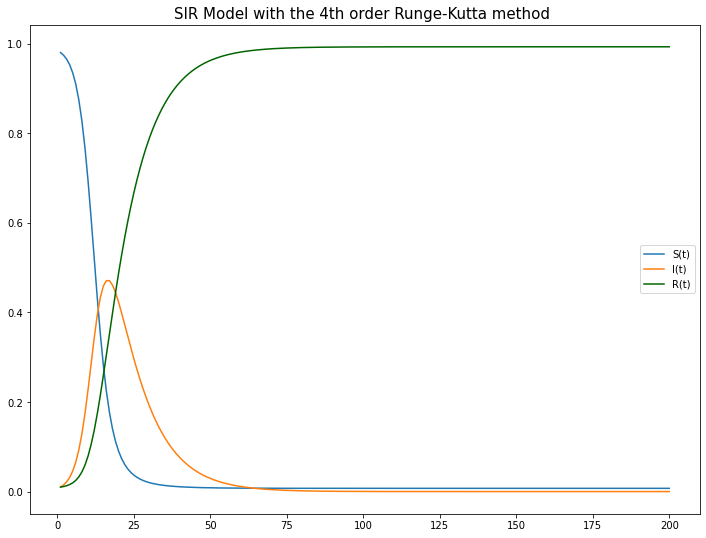

In [ ]:
plt.figure(figsize=(12,9))
plt.plot(range(1,201), res[0], label='S(t)')
plt.plot(range(1,201), res[1], label='I(t)')
plt.plot(range(1,201), res[2], color='darkgreen', label='R(t)')
plt.legend()
plt.title("SIR Model with the 4th order Runge-Kutta method ", fontsize=15)
plt.show()

## 5. Play around with different values of β,γ and N so that I(t) agrees with the data in Q1 and Q2. From these values of β,γ and N, estimate R0 for these 2 periods. 

### Period1

In [ ]:
# RK4(remove the 'r')
def RK4(s, i, r, beta, gamma, N):
    s_all = []
    i_all = []
    r_all = []

    s_all.append(s)
    i_all.append(i)
    r_all.append(r)
    
    
    for ii in range(1,200):
        k1_s = SIR_S(s, i, beta)
        k1_i = SIR_I(s, i, beta, gamma)
       
       
        k2_s = SIR_S(s+k1_s/2.0, i+k1_i/2.0, beta)
        k2_i = SIR_I(s+k1_s/2.0, i+k1_i/2.0, beta, gamma)
        
        
        k3_s = SIR_S(s+k2_s/2.0, i+k2_i/2.0, beta)
        k3_i = SIR_I(s+k2_s/2.0, i+k2_i/2.0, beta, gamma)
        
       
        k4_s = SIR_S(s+k3_s, i+k3_i, beta)
        k4_i = SIR_I(s+k3_s, i+k3_i, beta, gamma)
        
    
        s = s + k1_s/6.0 + k2_s/3.0 + k3_s/3.0 + k4_s/6.0
        i = i + k1_i/6.0 + k2_i/3.0 + k3_i/3.0 + k4_i/6.0
        r = N - s - i
        
        s_all.append(s)
        i_all.append(i)
        r_all.append(r)
    
    return [s_all, i_all, r_all]

#### Since the increase in the previous phase was too small, i choose the data from April 1st

In [ ]:
df1_new = df1[46:]

In [ ]:
df1_new = df1_new.reset_index(drop=True)

In [ ]:
df1_new

,Date,Cases
0,2020-04-01,752
1,2020-04-02,779
2,2020-04-03,827
3,2020-04-04,886
4,2020-04-05,983
...,...,...
86,2020-06-26,6104
87,2020-06-27,6057
88,2020-06-28,5925
89,2020-06-29,5650


#### Since the recovery period of COVID-19 is about 14 days, gamma=1/14

In [ ]:
b_best = 0
n_best = 0
t1 = 99999999999999
gamma = 1/14
I_val = df1_new["Cases"]
for n in range(10000, 3000000, 10000):
    for beta_t in np.arange(0.01, 1, 0.01):
        i = 752
        s = n - i
        r = 0
        t = 0
        beta = beta_t/n
        res = RK4(s, i, r, beta, gamma, n)
        for index in range(len(I_val)):
            t += (I_val[index] - res[1][index])**2
        if t <= t1:
            t1 = t
            b_best = beta_t
            n_best = n

In [ ]:
n_best

80000

In [ ]:
b_best

0.19

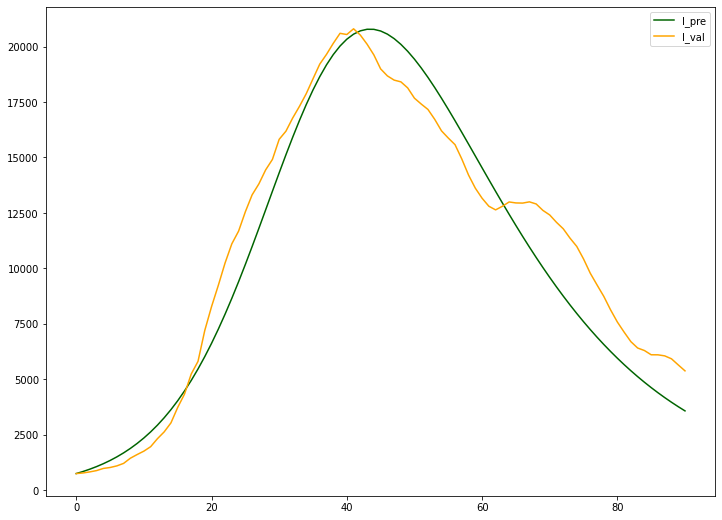

In [ ]:
N = 80000
i = 752
s = N-i
r = 0
beta = 0.19/N
gamma = 1/14

res = RK4(s, i, r, beta, gamma, N)
plt.figure(figsize=[12, 9])
plt.plot(range(len(df1_new["Date"])), res[1][:len(df1_new["Date"])], label='I_pre',color='darkgreen')
plt.plot(range(len(df1_new["Date"])), df1_new["Cases"], label='I_val',color='orange')
plt.legend()
plt.show()

In [ ]:
r = beta * N /gamma
print(f"R0 of first period is {r}")

R0 of first period is 2.66


### Period2

In [ ]:
df2 = df2.reset_index(drop=True)
df2

,Date,Cases
0,2021-12-27,2696
1,2021-12-28,2776
2,2021-12-29,2840
3,2021-12-30,2877
4,2021-12-31,2868
...,...,...
79,2022-03-16,42330
80,2022-03-17,43037
81,2022-03-18,37938
82,2022-03-19,36643


In [ ]:
b_best = 0
n_best = 0
t1 = 99999999999999
gamma = 1/14
I_val = df2["Cases"]
for n in range(10000, 3000000, 10000):
    for beta_t in np.arange(0.01, 1, 0.01):
        i = 2696
        s = n - i
        r = 0
        t = 0
        beta = beta_t/n
        res = RK4(s, i, r, beta, gamma, n)
        for index in range(len(I_val)):
            t += (I_val[index] - res[1][index])**2
        if t <= t1:
            t1 = t
            b_best = beta_t
            n_best = n

In [ ]:
n_best

340000

In [ ]:
b_best

0.15000000000000002

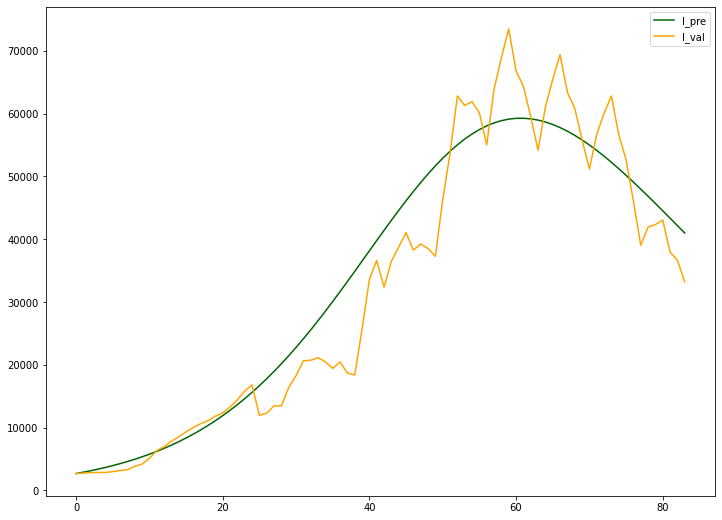

In [ ]:
N = 340000
i = 2696
s = N-i
r = 0
beta = 0.15/N
gamma = 1/14

res = RK4(s, i, r, beta, gamma, N)
plt.figure(figsize=[12, 9])
plt.plot(range(len(df2["Date"])), res[1][:len(df2["Date"])], label='I_pre',color='darkgreen')
plt.plot(range(len(df2["Date"])), df2["Cases"], label='I_val',color='orange')
plt.legend()
plt.show()

In [ ]:
r = beta * N /gamma
print(f"R0 of first period is {r}")

R0 of first period is 2.1
